In [1]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('clustering.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


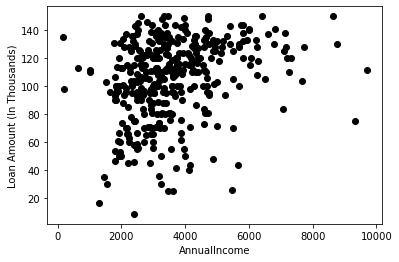

In [3]:
X = data[["LoanAmount","ApplicantIncome"]]
#Visualise data points
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

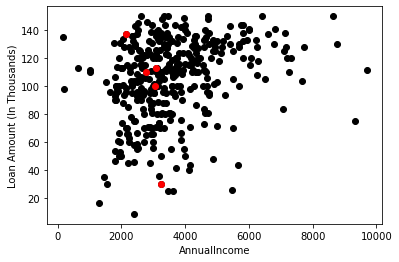

In [4]:
# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

#number of clusters
K=5

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

In [5]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["ApplicantIncome"]-row_d["ApplicantIncome"])**2
            d2=(row_c["LoanAmount"]-row_d["LoanAmount"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['LoanAmount'] - Centroids['LoanAmount']).sum() + (Centroids_new['ApplicantIncome'] - Centroids['ApplicantIncome']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]

C:\Users\ppvas\AppData\Local\Temp/ipykernel_13228/3142618123.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
C:\Users\ppvas\AppData\Local\Temp/ipykernel_13228/3142618123.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C


600.1499001347032
527.500586514055
365.97447936025856
675.3742686142954
521.1506926474514
299.81993526572097
227.80234199924513
269.7201621324001
206.82873233154518
141.90024507725752
106.57729736789567
166.3953452023934
108.30221325712687
110.29075970724854
195.1693311191969
50.15599325297575
70.53826262272149
89.46182808123689
124.09019771432935
28.545545955791496
15.876805168918182
23.615315315315343
47.30746130746151
36.31064230034757
32.13446975516662
12.164253922582404
0.0


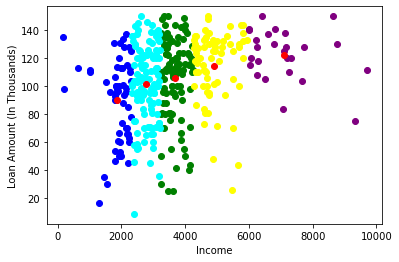

In [6]:
color=['blue','green','cyan','yellow','purple']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k])
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

In [76]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=5, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(X)

kmeans.inertia_

367418549.6880496

In [77]:
pred = kmeans.predict(X)
X['cluster'] = pred
centroids = X.groupby(["cluster"]).mean()[["LoanAmount","ApplicantIncome"]]

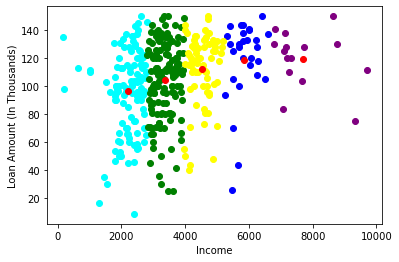

In [78]:
color=['cyan','blue','green','yellow','purple']
for k in range(K):
    data=X[X["cluster"]==k]
    plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k])
plt.scatter(centroids["ApplicantIncome"],centroids["LoanAmount"],c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

In [37]:
# defining the kmeans function with initialization as k-means++
kmeans_r = KMeans(n_clusters=5, init='random')

# fitting the k means algorithm on scaled data
kmeans_r.fit(X)

kmeans_r.inertia_

382345575.82119745

In [38]:
pred_r = kmeans_r.predict(X)
X['cluster_r'] = pred_r
centroids_r = X.groupby(["cluster_r"]).mean()[["LoanAmount","ApplicantIncome"]]

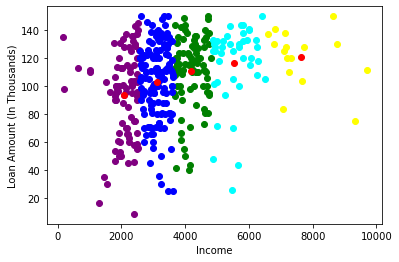

In [40]:
color=['purple','yellow','green','cyan','blue']
for k in range(K):
    data=X[X["cluster_r"]==k]
    plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k])
plt.scatter(centroids_r["ApplicantIncome"],centroids_r["LoanAmount"],c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

In [121]:
X.head()

,LoanAmount,ApplicantIncome,1,2,3,4,5,Cluster,cluster,cluster_r
0,128.0,4583,2504.851777,2724.341566,1801.032135,309.728583,917.921705,4,4,0
1,66.0,3000,4088.239254,1141.349738,220.716102,1893.071891,666.537577,3,0,4
2,120.0,2583,4504.846958,724.681639,200.017007,2309.450443,1082.438401,3,2,4
3,141.0,6000,1088.000196,4141.391519,3218.079668,1107.866915,2334.918929,1,3,0
4,95.0,2333,4754.926793,474.105227,449.209857,2559.520537,1332.389900,3,2,1
